In [11]:
# Dependencies and Setup
#%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from statsmodels.formula.api import glm
import statsmodels.api as sm

In [12]:
#Read data
data = pd.read_csv("train.csv")
#take natural log of SalePrice
data["ln_SalePrice"] = np.log(data["SalePrice"])

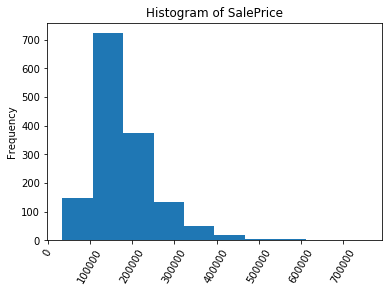

In [13]:
# Historgram of target
target = "SalePrice"
data[target].plot.hist()
plt.xticks(rotation=60)
plt.title("Histogram of " + target)
plt.show()

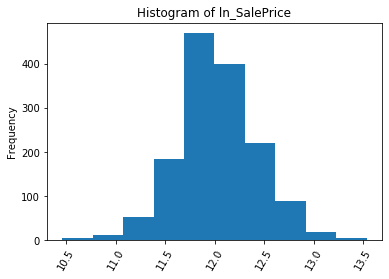

In [14]:
# Historgram of target
target = "ln_SalePrice"
data[target].plot.hist()
plt.xticks(rotation=60)
plt.title("Histogram of " + target)
plt.show()

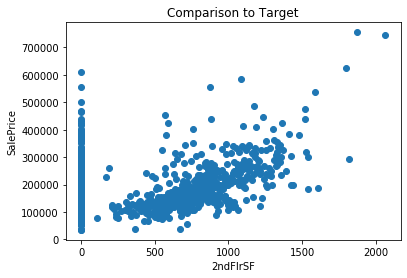

In [15]:
#Oneway plots of field versus target
target = "SalePrice"
field1 = data.columns[44]

oneway = data[[field1,target]]
plt.scatter(oneway[field1],oneway[target])
plt.title("Comparison to Target")
plt.xlabel(oneway.columns[0])
plt.ylabel(oneway.columns[1])
plt.show()

In [16]:
# GLM consistent with Ordinary least squares
dev_comp = pd.DataFrame()
fields = []
dev1 = []
dev2 = []

for i in range(80):
    form1 = "ln_SalePrice ~ " + data.columns[i]
    fields.append(data.columns[i])
    try:
        model_ols = glm(formula = form1, data = data,family = sm.families.Gaussian()).fit()
        dev1.append(model_ols.null_deviance - model_ols.deviance)
    except:
        dev1.append(0)
    
    form1 = "SalePrice ~ " + data.columns[i]
    try:
        model_ols = glm(formula = form1, data = data,family = sm.families.Gaussian()).fit()
        dev2.append(model_ols.null_deviance - model_ols.deviance)
    except:
        dev2.append(0)
        
    dev_comp.append([data.columns[i], dev1])

dev_comp["Fields"] = fields
dev_comp["Dev1"] = dev1
dev_comp["Dev2"] = dev2
dev_comp = dev_comp.sort_values(by="Dev1", ascending=False)
print(dev_comp)

           Fields        Dev1          Dev2
17    OverallQual  155.462039  5.760947e+12
12   Neighborhood  132.884425  5.023606e+12
46      GrLivArea  114.374538  4.623740e+12
61     GarageCars  107.844935  3.776385e+12
27      ExterQual  107.349496  4.395744e+12
53    KitchenQual  104.210816  4.204320e+12
62     GarageArea   98.627072  3.578809e+12
30       BsmtQual   96.017988  4.066554e+12
38    TotalBsmtSF   87.232270  3.466605e+12
49       FullBath   82.353698  2.894450e+12
19      YearBuilt   80.098477  2.517642e+12
20   YearRemodAdd   74.475776  2.367827e+12
29     Foundation   70.690176  2.360618e+12
54   TotRmsAbvGrd   66.489519  2.622969e+12
60   GarageFinish   64.417274  2.299993e+12
59    GarageYrBlt   58.304718  2.035564e+12
56     Fireplaces   55.769899  2.007532e+12
40      HeatingQC   54.362995  1.800151e+12
58     GarageType   53.616641  1.778186e+12
25     MasVnrType   44.551599  1.713827e+12
33   BsmtFinType1   43.720883  1.726056e+12
26     MasVnrArea   42.951032  2

In [17]:
# Import data to convert text fields to categorical fields
data1 = pd.read_csv("train.csv")
data1["ln_SalePrice"] = np.log(data1["SalePrice"])
obj_list = data1.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
le = LabelEncoder()

for i in obj_list.index:
    try:
        le.fit(data1[i])
        data1[i] = le.transform(data1[i])
    except:
        data1[i] = pd.get_dummies(data1[i])

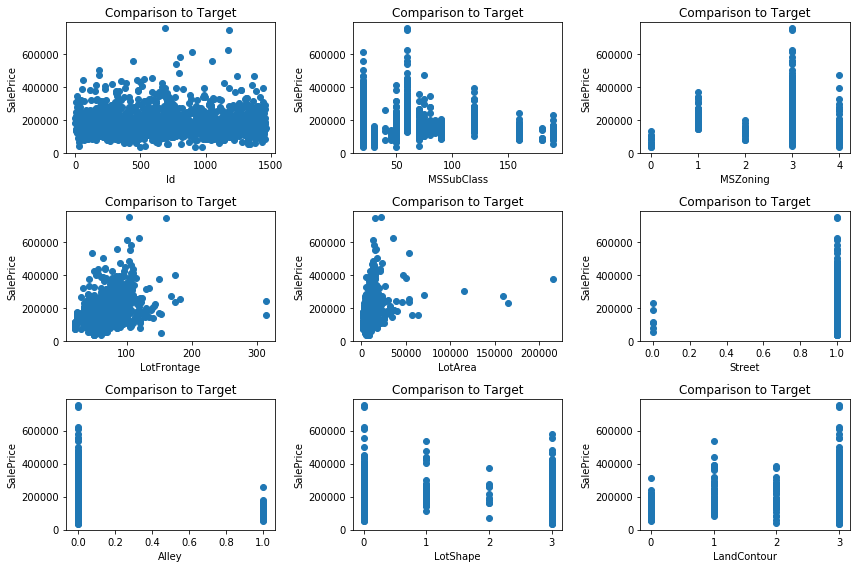

In [18]:
# Plot oneway graphs field versus target
j = 0 #select the starting field for the 9 plots
fig = plt.figure(figsize=(12,8))

for i in range(9):
    field1 = data1.columns[j]
    oneway = data1[[field1,target]]
    plt.subplot(3,3,i+1)
    try:
        plt.scatter(oneway[field1],oneway[target])
    except:
        plt.scatter(0,0)
    plt.title("Comparison to Target")
    plt.xlabel(oneway.columns[0])
    plt.ylabel(oneway.columns[1])
    j=j+1

plt.tight_layout()
#plt.savefig("Images/Group9.png")
plt.show()

In [19]:
# Show the average target by selected fields (i)
i= 16
d1 = data1.groupby(data1.columns[i])
d1["SalePrice"].mean()

HouseStyle
0    143116.740260
1    110150.000000
2    175985.477961
3    220000.000000
4    157354.545455
5    210051.764045
6    135074.486486
7    166703.384615
Name: SalePrice, dtype: float64

In [20]:
# Create formula (form1) for use in linear models
a = data1.columns[4]
b = data1.columns[17]
c = data1.columns[20]
d = data1.columns[38]
e = data1.columns[46]

form1 = "SalePrice ~ " + a + " + " +  b + " + " + c + " + " + d + " + " + e
form1

'SalePrice ~ LotArea + OverallQual + YearRemodAdd + TotalBsmtSF + GrLivArea'

In [36]:
# GLM consistent with Ordinary least squares
model_ols = glm(formula = form1, data = data1,family = sm.families.Gaussian()).fit()
print(model_ols.null_deviance - model_ols.deviance)
print(model_ols.summary())
print(model_ols.params)
#model_ols.stand_errors
modl = [this for this in model_ols.params]
se = [1.5*10**6,0.109,1123.188,59.464,2.881,2.526]

tmp = []

for i in range(len(se)):
    tmp.append(modl[i]/se[i])
    
tmp

6991790484001.785
                 Generalized Linear Model Regression Results                  
Dep. Variable:              SalePrice   No. Observations:                 1460
Model:                            GLM   Df Residuals:                     1454
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                      1.5242e+09
Method:                          IRLS   Log-Likelihood:                -17504.
Date:                Wed, 24 Jul 2019   Deviance:                   2.2161e+12
Time:                        21:46:30   Pearson chi2:                 2.22e+12
No. Iterations:                     3   Covariance Type:             nonrobust
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.054e+06   1.15e+05     -9.148      0.000   -1.28e+06   -8.28e+05
LotArea          0.6950     

[-0.7024905815601858,
 6.376380442340928,
 21.95460183904647,
 8.224841395545416,
 11.370041039117984,
 18.689185538100627]

In [12]:
# GLM with Poisson family
model_glm = glm(formula = form1, data = data1, family = sm.families.Poisson()).fit()
print(model_glm.null_deviance - model_glm.deviance)
print(model_glm.null_deviance - model_ols.deviance)
print(model_glm.summary())

35587111.89821501
-2216076228999.5854
                 Generalized Linear Model Regression Results                  
Dep. Variable:              SalePrice   No. Observations:                 1460
Model:                            GLM   Df Residuals:                     1454
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.5274e+06
Date:                Mon, 22 Jul 2019   Deviance:                   9.0345e+06
Time:                        16:30:15   Pearson chi2:                 8.27e+06
No. Iterations:                     6   Covariance Type:             nonrobust
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.6252      0.008    478.903      0.000       3.610       3.640
LotArea 

In [13]:
# GLM consistent with Ordinary least squares
model_glm = glm(formula = form1, data = data1, family = sm.families.Gamma(link = sm.families.links.log)).fit()
print(model_glm.null_deviance - model_glm.deviance)
print(model_glm.summary())

197.31349341634444
                 Generalized Linear Model Regression Results                  
Dep. Variable:              SalePrice   No. Observations:                 1460
Model:                            GLM   Df Residuals:                     1454
Model Family:                   Gamma   Df Model:                            5
Link Function:                    log   Scale:                        0.023940
Method:                          IRLS   Log-Likelihood:                -17041.
Date:                Mon, 22 Jul 2019   Deviance:                       41.443
Time:                        16:30:15   Pearson chi2:                     34.8
No. Iterations:                    17   Covariance Type:             nonrobust
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.7055      0.456      8.117      0.000       2.811       4.600
LotArea       3.942e-06   4